# **Data Mining coursework on predicting linear B-cell epitopes from protein sequences using Data analysis**
#### Student: Vignesh Krishnkumar
#### Student ID: 230435614
#### Programme: MSC DATAN

## Abstract

The main objective of this project is to build a predicitve pipeline focusing on linear B-cell epitopes from protein sequences which will aid in vaccines and therapeutic development. To achieve this goal a series of steps were taken with trails to give the best protein sequence. The dataset includes 102 types of proteins taken from Immune Epitope Database (IEDB) and NCBI Protein using research tools with one target class. Key steps in this project include Exploratory Data Analysis, data pre-processing, feature reduction and model fitting. All this will be done only on 80 percent of the data leaving the rest 20 percent for testing and to predict the best model which works well on unseen data. This reduces the bias of the model and provides a clear outcome on which model has best descriminative ability checked using the parameter ROC curve. This goal was achieved with RandomForest Classifier being the best model providing the highest area under curve with a ROC value of 0.56 from the test data in the pipeline.

Abbreviations:
ROC - Receiver Operating Characteristic Curve, 
AUC - Area Under Curve, 
EDA - Exploratory Data Analysis

## Exploratory Data Analysis

EDA is the first basic step to be performed on any given dataset. Under EDA we have explored data in different forms and visualized the data which is present. First data was imported as dataframe and differnt types of graphs were used to represent the data to give a clear picture of the range of data which is being dealt with. And class distribution was done to study the imbalance of the data along with a study on outlier's present in the data.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
# Read the document
df = pd.read_csv("D:/Vignesh/Understanding Data/df.csv")
df

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,2.840224,83,163,21,41,0,2111.31,0.200000,0.266667,0.133333,...,0.000000,0.000000,0.133333,0.000000,0.133333,0.066667,0.000000,0.000000,0.133333,Negative
1,2.923231,73,149,21,40,0,1961.08,0.400000,0.533333,0.266667,...,0.133333,0.000000,0.066667,0.066667,0.066667,0.266667,0.000000,0.000000,0.000000,Negative
2,3.106891,81,150,20,39,0,2028.18,0.133333,0.266667,0.200000,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
3,2.840224,66,130,18,35,4,1864.09,0.533333,0.800000,0.200000,...,0.133333,0.133333,0.000000,0.000000,0.133333,0.066667,0.000000,0.066667,0.000000,Negative
4,3.373557,74,144,22,34,1,1918.13,0.266667,0.533333,0.400000,...,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.133333,0.000000,0.066667,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,2.815922,57,125,17,37,5,1801.03,0.666667,0.866667,0.066667,...,0.066667,0.066667,0.000000,0.000000,0.066667,0.200000,0.000000,0.000000,0.000000,Positive
7828,3.139572,67,130,16,37,1,1783.89,0.600000,0.666667,0.266667,...,0.000000,0.066667,0.066667,0.000000,0.200000,0.133333,0.000000,0.000000,0.066667,Negative
7829,3.106891,73,136,18,37,1,1890.03,0.200000,0.733333,0.133333,...,0.066667,0.266667,0.000000,0.000000,0.000000,0.133333,0.066667,0.000000,0.000000,Negative
7830,2.656565,70,131,19,39,0,1862.92,0.400000,0.533333,0.066667,...,0.000000,0.133333,0.266667,0.000000,0.133333,0.066667,0.000000,0.000000,0.133333,Negative


In [3]:
# Reading the number of observations and variables
df.shape
print("Number of Observations:",df.shape[0])
print("Number of Variables:",df.shape[1])

Number of Observations: 7832
Number of Variables: 103


In [4]:
# Showing the full info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832 entries, 0 to 7831
Columns: 103 entries, feat_seq_entropy to Class
dtypes: float64(97), int64(5), object(1)
memory usage: 6.2+ MB


In [5]:
# Mathematical description of the dataset
df.describe()

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y
count,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,...,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000
mean,3.011067,74.084142,145.992594,20.487743,37.586568,0.600358,1944.537088,0.283563,0.504758,0.260981,...,0.020710,0.047080,0.062317,0.062334,0.047302,0.073119,0.055524,0.060717,0.010972,0.031163
std,0.423369,8.518592,12.760805,3.365961,3.103610,0.909738,137.624202,0.148886,0.167106,0.134095,...,0.044805,0.062237,0.084435,0.110469,0.065798,0.078119,0.065270,0.065445,0.028616,0.050265
min,0.353359,41.000000,91.000000,15.000000,30.000000,0.000000,1351.360000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.866248,69.000000,138.000000,18.000000,35.000000,0.000000,1862.890000,0.200000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.106891,74.000000,147.000000,20.000000,38.000000,0.000000,1953.920000,0.266667,0.533333,0.266667,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.000000
75%,3.323231,80.000000,155.000000,22.000000,40.000000,1.000000,2038.400000,0.400000,0.600000,0.333333,...,0.000000,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.066667,0.000000,0.066667
max,3.906891,113.000000,194.000000,44.000000,54.000000,9.000000,2400.800000,1.000000,1.000000,0.800000,...,0.600000,0.933333,0.666667,0.866667,0.600000,0.600000,0.466667,0.400000,0.333333,0.600000


Studying the range of data which we are going to work in further processes the df.describe() was used.

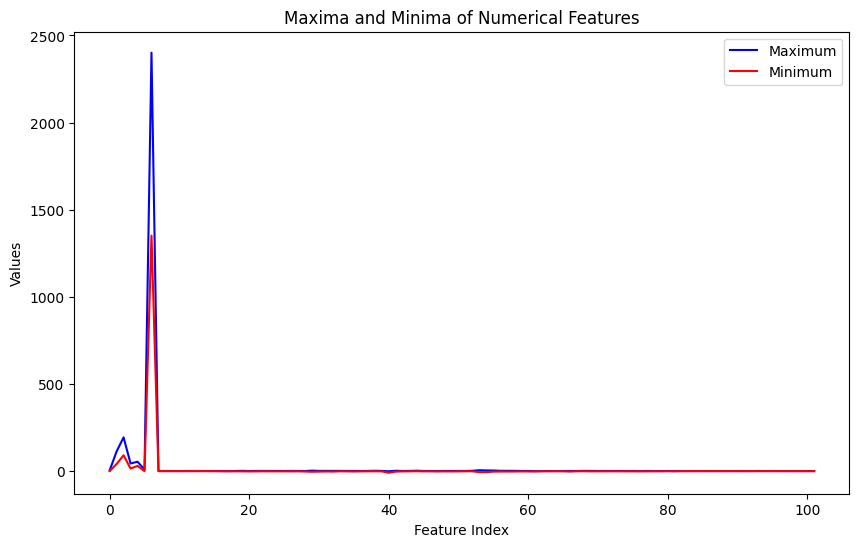

In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate maxima, minima, and ranges
maximum = df[numerical_cols].max()
minimum = df[numerical_cols].min()
ranges = maximum - minimum

plt.figure(figsize=(10, 6))

# Line chart for maxima and minima
plt.plot(maximum.values, label='Maximum', color='blue')
plt.plot(minimum.values, label='Minimum', color='red')
plt.xlabel('Feature Index')
plt.ylabel('Values')
plt.title('Maxima and Minima of Numerical Features')
plt.legend()
plt.show()

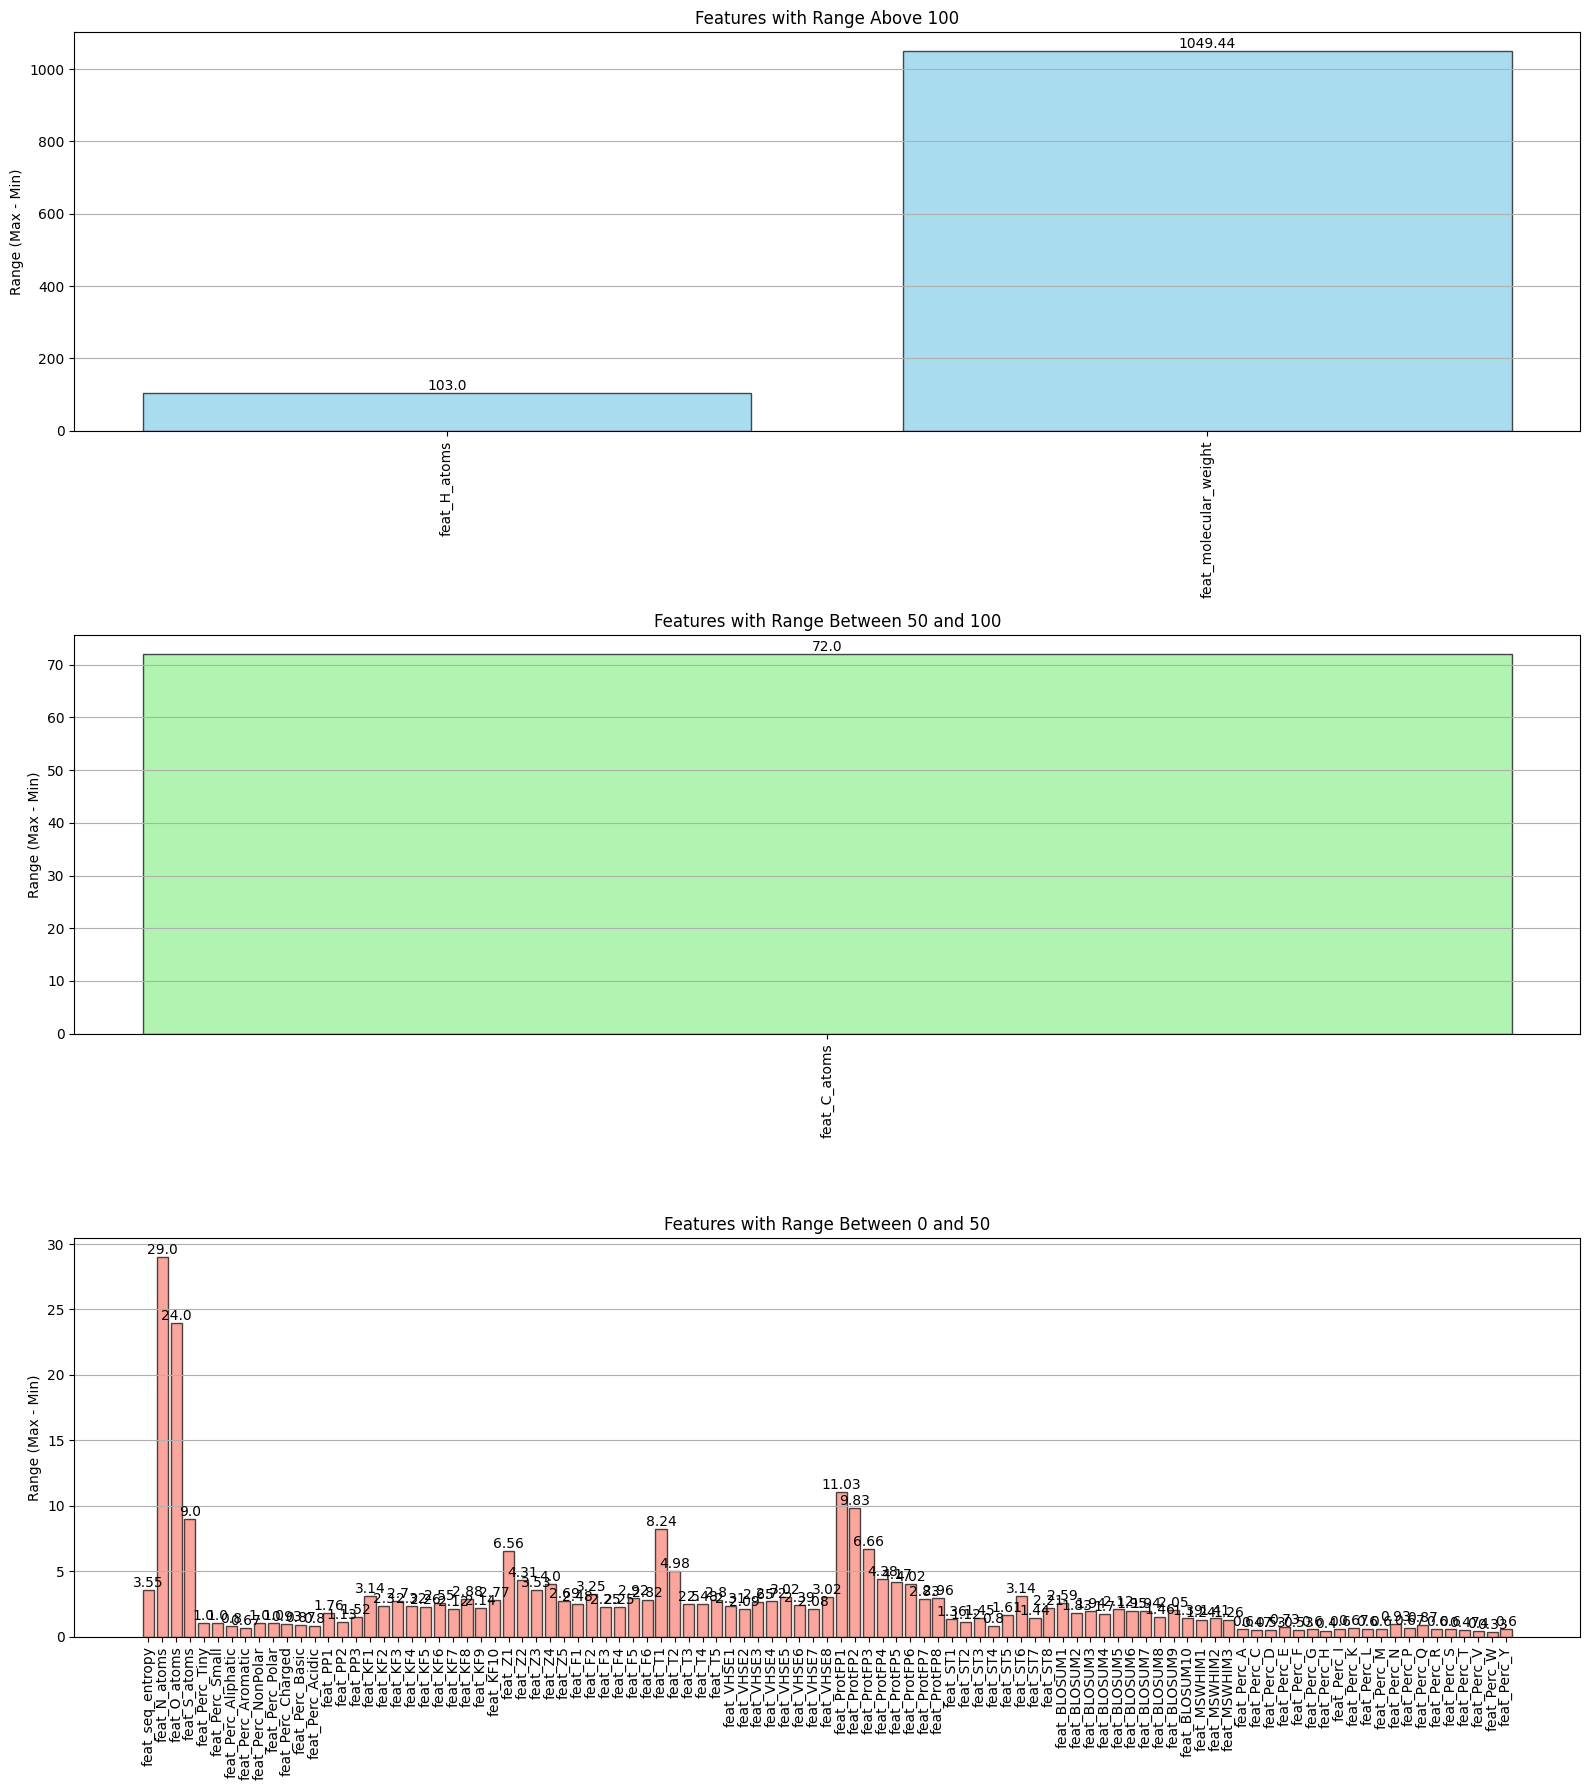

In [7]:
# Studying the data according to range of min-max moin re detail 

# Filter the ranges
above_100 = ranges[ranges > 100]
between_50_and_100 = ranges[(ranges > 50) & (ranges <= 100)]
between_0_and_50 = ranges[ranges <= 50]

# Defining the postioning of Histograms
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Histogram for values above 100
axs[0].bar(above_100.index, above_100.values, color='skyblue', edgecolor='k', alpha=0.7)
axs[0].set_title('Features with Range Above 100')
axs[0].set_ylabel('Range (Max - Min)')
axs[0].set_xticks(above_100.index)
axs[0].set_xticklabels(above_100.index, rotation=90)
axs[0].grid(True, axis='y')
for i, v in enumerate(above_100):
    axs[0].text(i, v, round(v, 2), ha='center', va='bottom')

# Histogram for values between 50 and 100
axs[1].bar(between_50_and_100.index, between_50_and_100.values, color='lightgreen', edgecolor='k', alpha=0.7)
axs[1].set_title('Features with Range Between 50 and 100')
axs[1].set_ylabel('Range (Max - Min)')
axs[1].set_xticks(between_50_and_100.index)
axs[1].set_xticklabels(between_50_and_100.index, rotation=90)
axs[1].grid(True, axis='y')
for i, v in enumerate(between_50_and_100):
    axs[1].text(i, v, round(v, 2), ha='center', va='bottom')

# Histogram for values between 0 and 50
axs[2].bar(between_0_and_50.index, between_0_and_50.values, color='salmon', edgecolor='k', alpha=0.7)
axs[2].set_title('Features with Range Between 0 and 50')
axs[2].set_ylabel('Range (Max - Min)')
axs[2].set_xticks(between_0_and_50.index)
axs[2].set_xticklabels(between_0_and_50.index, rotation=90)
axs[2].grid(True, axis='y')
for i, v in enumerate(between_0_and_50):
    axs[2].text(i, v, round(v, 2), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

Above we get to see two different types of graph had been used, one is line graph and other is bar graph. First we checked maxima-minima range of all the features and then we used bar graph to differentiate on how the features range with respect to its value.

Three different range separations were used to show which features are closely present and which varies the most.

This gives a clear picture on how varied the data is and what are all the process required to be done in data pre-processing stage.

Under Class distribution we are going to study the target column "Class" upon which the data is going to be predicted.

Class Distribution:
 Class
Negative    5288
Positive    2544
Name: count, dtype: int64


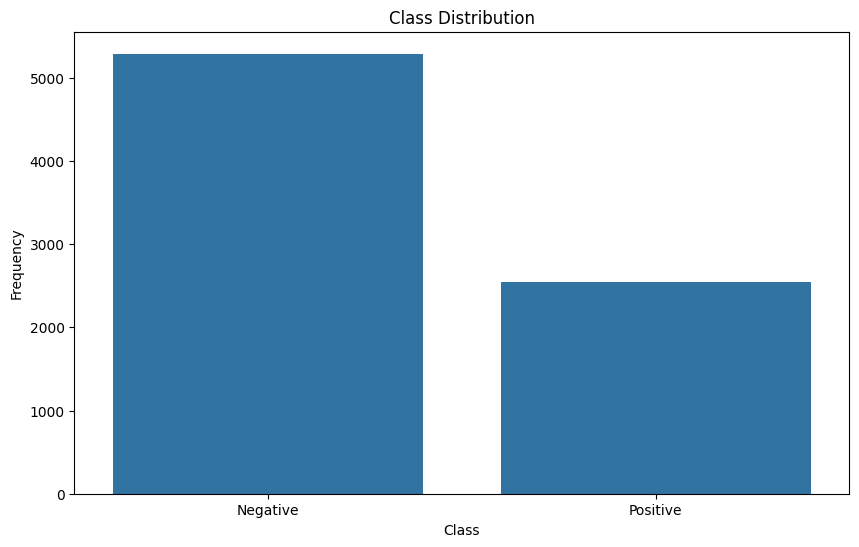

In [8]:
# Class Distribution

# Specify the target column
target_column = 'Class'

# Calculate the class distribution
target_class_distribution = df[target_column].value_counts()
print("Class Distribution:\n", target_class_distribution)

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=target_column)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Under class distribution we could see that the target column has a highly varied class between the positive and negative values. We could see negative out number the positive class by around 3000 values which is too high of difference. This varied distribution is handled under data pre-processing stage to rebalance the data to get a good result upon which conclusions can be made.  

Number of outliers detected using Isolation Forest: 534


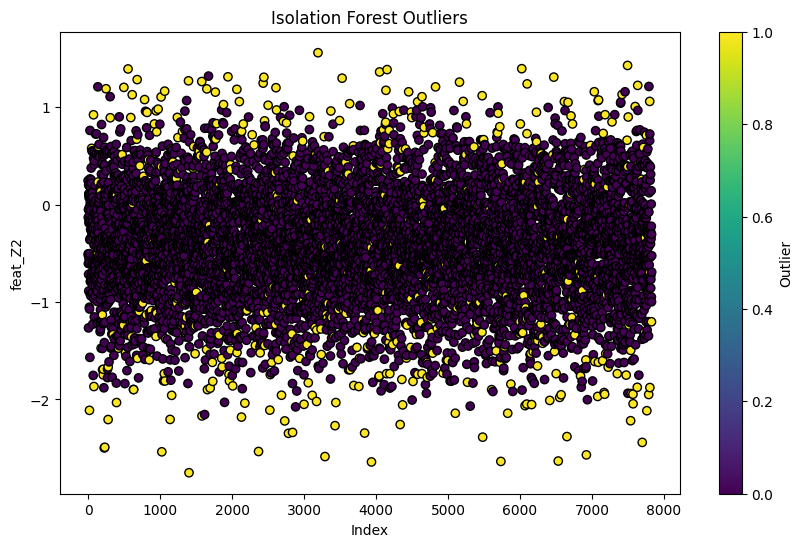

In [9]:
# Checking for outliers
# Create a copy of dataframe
df1 = df.copy()

# Selecting only float and int in columns
numerical_cols = df1.select_dtypes(include=[float, int]).columns

# Train Isolation Forest model [4]
iso_forest = IsolationForest(random_state=42)
outliers_iso = iso_forest.fit_predict(df1[numerical_cols])
# df["outliers"] = outliers_iso

# Convert predictions (-1 indicates outliers)
outliers_iso = pd.Series(outliers_iso, index=df1.index)
outliers_iso = outliers_iso.map({1: False, -1: True})

# Print the number of outliers detected
num_outliers_iso = outliers_iso.sum()
print(f"Number of outliers detected using Isolation Forest: {num_outliers_iso}")

# Visualize outliers of one column
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1[numerical_cols[30]], c=outliers_iso, cmap='viridis', edgecolor='k')
plt.title('Isolation Forest Outliers')
plt.xlabel('Index')
plt.ylabel(numerical_cols[30])
plt.colorbar(label='Outlier')
plt.show()

On the first line you could see a copy of dataframe is being made since here we are just studying about the presence of outliers, there should be any changes made on the main dataframe. Due to doubts of removal of huge amount of data before pre-processing copy of dataframe was used for this study.

Above we could see a graph of feat_Z2 a feature from the dataframe and the outlier has been colour mapped. We could see clearly that the yellow's are the outliers for this feature and the purple's are grouped together showing them as non-outlier's. But this process will be treated only for the X_train data only under data pre-processing.

# Data Pre-processing

In Data pre-processing we have checked for duplicates, treated for missing values, removing Nan values and treating outliers present in the dataset. If missing values are present we impute the data to fill the missing value according to the mean of all the values present in that column. Since there is no missing values identified in our dataset we can proceed without imputing the data. 

First duplicates from the full data is removed and rest of the above mentioned activities are done on the train data set only. 

We split the data first and then treated only the 80 percent of the data through the above mentioned process. 

In [10]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split

In [11]:
# Removing duplicates values from the dataframe.
df = df.drop_duplicates()
df

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,2.840224,83,163,21,41,0,2111.31,0.200000,0.266667,0.133333,...,0.000000,0.000000,0.133333,0.000000,0.133333,0.066667,0.000000,0.000000,0.133333,Negative
1,2.923231,73,149,21,40,0,1961.08,0.400000,0.533333,0.266667,...,0.133333,0.000000,0.066667,0.066667,0.066667,0.266667,0.000000,0.000000,0.000000,Negative
2,3.106891,81,150,20,39,0,2028.18,0.133333,0.266667,0.200000,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
3,2.840224,66,130,18,35,4,1864.09,0.533333,0.800000,0.200000,...,0.133333,0.133333,0.000000,0.000000,0.133333,0.066667,0.000000,0.066667,0.000000,Negative
4,3.373557,74,144,22,34,1,1918.13,0.266667,0.533333,0.400000,...,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.133333,0.000000,0.066667,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,2.472906,67,130,18,36,0,1763.83,0.533333,0.800000,0.533333,...,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.000000,0.000000,Negative
7827,2.815922,57,125,17,37,5,1801.03,0.666667,0.866667,0.066667,...,0.066667,0.066667,0.000000,0.000000,0.066667,0.200000,0.000000,0.000000,0.000000,Positive
7828,3.139572,67,130,16,37,1,1783.89,0.600000,0.666667,0.266667,...,0.000000,0.066667,0.066667,0.000000,0.200000,0.133333,0.000000,0.000000,0.066667,Negative
7829,3.106891,73,136,18,37,1,1890.03,0.200000,0.733333,0.133333,...,0.066667,0.266667,0.000000,0.000000,0.000000,0.133333,0.066667,0.000000,0.000000,Negative


In [12]:
# Assinging X and y values
X = df.drop(columns=target_column)
y = df[target_column]

Assigning X and Y values before the split. And we could see only X has all the columns except the target column. Y only has the target column.

In [13]:
# Split the data 80:20 for pre-processing [5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Stratified split has been applied so that splitting happens in a more orderely fashion so that further cross validations can be done in the later stages.

In [14]:
# Verify if missing values are present in rows and columns
miss_obs_row = X_train.isnull().sum(axis=1)
print("Values missing in rows\n",miss_obs_row)

miss_obs_col = X_train.isnull().sum(axis=0)
print("\nValues missing in columns\n",miss_obs_col)

Values missing in rows
 90      0
2874    0
4769    0
601     0
5837    0
       ..
5305    0
2786    0
5074    0
2303    0
4144    0
Length: 5833, dtype: int64

Values missing in columns
 feat_seq_entropy    0
feat_C_atoms        0
feat_H_atoms        0
feat_N_atoms        0
feat_O_atoms        0
                   ..
feat_Perc_S         0
feat_Perc_T         0
feat_Perc_V         0
feat_Perc_W         0
feat_Perc_Y         0
Length: 102, dtype: int64


In [15]:
print("Shape of X_train before outlier treatment:",X_train.shape)

Shape of X_train before outlier treatment: (5833, 102)


We have used Isolation Forest for the treatment of outliers in the X_train dataset.The shape of dataset before and after has been shown as outputs.

In [16]:
# Outlier Treatment
iso_forest = IsolationForest(random_state=42)
outliers = iso_forest.fit_predict(X_train.select_dtypes(include=[float, int]))
X_train['outliers'] = outliers

In [17]:
# Remove outliers
non_outliers_indices = X_train[X_train['outliers'] != -1].index
X_train = X_train.loc[non_outliers_indices].drop(columns='outliers')
y_train = y_train.loc[non_outliers_indices]

In [18]:
# Printing X_train after removing outliers
print("Shape of X_train after outlier treatment:",X_train.shape)

Shape of X_train after outlier treatment: (5438, 102)


In [19]:
# Variable Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(include=[float, int])), columns=X_train.select_dtypes(include=[float, int]).columns)

Standard scaler was implemented after outlier treatment to make sure the data has less standard deviation and can provide better results.

In [20]:
# Encode target variable to numeric
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

Label encoding was done on the y_train data to convert the string variables to 0 & 1.

In [21]:
X_train_scaled

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y
0,-0.432333,0.232669,-0.556973,-0.149744,0.482630,0.460173,0.361974,1.364541,1.073763,-1.066192,...,-0.499101,1.438715,-0.770927,-0.589365,0.351316,-0.088897,3.232593,0.059507,-0.397365,-0.669968
1,-1.497961,-0.029478,-0.294229,-1.152175,-0.562172,0.460173,-0.559933,-0.116670,0.633838,-1.066192,...,1.122232,-0.811747,3.617078,0.745204,-0.781812,1.718280,0.144432,-0.964537,-0.397365,-0.669968
2,1.087376,0.232669,-0.294229,-1.152175,0.830898,0.460173,0.171000,-0.610407,0.633838,1.076832,...,-0.499101,0.313484,-0.770927,0.077919,-0.781812,-0.088897,-0.884955,2.107594,-0.397365,0.754303
3,0.707449,-0.029478,-0.381811,-0.149744,0.830898,-0.694079,0.045953,-0.610407,-0.246012,-1.066192,...,-0.499101,0.313484,0.106674,-0.589365,-0.781812,-0.992485,0.144432,0.059507,-0.397365,-0.669968
4,-0.052406,0.101596,0.756744,0.184400,0.134363,1.614425,0.637392,-1.104144,-1.565786,0.541076,...,2.743565,0.313484,-0.770927,0.077919,-0.781812,-0.992485,-0.884955,-0.964537,-0.397365,-0.669968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,-2.238846,-1.995587,-1.257622,-0.149744,0.830898,-0.694079,-1.533736,2.352014,1.953613,-0.530436,...,-0.499101,-0.811747,-0.770927,0.745204,0.351316,4.429045,1.173819,2.107594,-0.397365,-0.669968
5434,0.470923,1.281261,0.581582,-0.483888,0.482630,-0.694079,0.886074,-1.104144,0.193913,0.541076,...,-0.499101,-0.811747,0.106674,-0.589365,-0.781812,-0.088897,0.144432,3.131638,1.964244,0.754303
5435,0.707449,0.625891,0.494001,1.186831,1.527433,-0.694079,1.359192,-0.610407,-0.685937,-1.066192,...,-0.499101,0.313484,-0.770927,1.412489,0.351316,-0.088897,0.144432,0.059507,-0.397365,2.178575
5436,0.850850,-0.029478,0.318838,-0.149744,0.134363,-0.694079,-0.152992,-0.610407,0.633838,0.541076,...,-0.499101,0.313484,0.106674,-0.589365,0.351316,0.814692,-0.884955,1.083551,-0.397365,0.754303


Above dataframe is the scaled data after all the initial pre-processing stages have been completed.

## Feature Reduction

Feature reduction is process to isolate the dataframe by reducing the not so influencing features from them so that machine learning models will only use the best features to predict the target.

In [22]:
# Import required libraries
from sklearn.preprocessing import MinMaxScaler
from skfeature.function.similarity_based import fisher_score

Here for feature reduction we have used fisher score method wherein first data points were scaled using minmaxscaler to remove the negative values for compatability of data with the model. The best features are selected for further modelling purposes.   

In [23]:
# Feature Selection using Fisher Score [1][2]
min_max_scaler = MinMaxScaler()
X_train_scaled_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_train_scaled), columns=X_train_scaled.columns)
fisher_scores = fisher_score.fisher_score(X_train_scaled_minmax.values, y_train_encoded)
fisher_scores_df = pd.DataFrame({'Feature': X_train_scaled_minmax.columns, 'Fisher Score': fisher_scores})
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher Score', ascending=False)
selected_features = fisher_scores_df['Feature'].head(10).values
print(f"Top features based on Fisher Score: {selected_features}")

Top features based on Fisher Score: ['feat_KF8' 'feat_F4' 'feat_Z5' 'feat_Perc_T' 'feat_H_atoms'
 'feat_BLOSUM4' 'feat_Perc_Y' 'feat_ST7' 'feat_BLOSUM7'
 'feat_Perc_Charged']


In [24]:
# Selecting the top features
X_selected = X_train_scaled_minmax[selected_features]

Only the selected features and their data has been asssigned to X_selected for further processes.

## Addressing class imbalance

For class rebalancing an over sampling method was implemented namely SMOTE (Synthetic Minority Oversampling Technique). SMOTE increases the synthetic samples of the minority class so that machine learning models are not as biased to one instance of the class. Here in our dataset we had higher negative instances than positive. Positive instances will be treated as minority and the samples of it would be made using KNN algorithm which is inbuilt in the function SMOTE() to address the rebalancing.

In [25]:
# Reseting index
X_selected.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

0    3634
1    3634
Name: count, dtype: int64


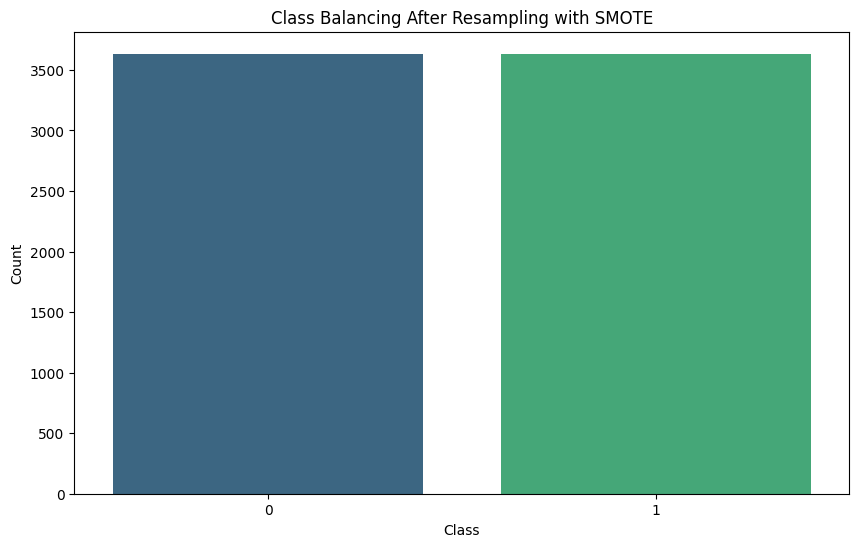

In [26]:
# Class Rebalancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_train_encoded)

# Converting the output to pandas dataframe.
print(pd.Series(y_resampled).value_counts())

# Visualize the class distribution using a bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled, hue=y_resampled, palette='viridis', legend=False)
plt.title('Class Balancing After Resampling with SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Model fitting

In model fitting we have used three different classifier models to find out the best fit model by using cross validation technique. This cross validation between model provides with reliable performance estimation and prevents overfitting of data. This also provides how the data behaves on different folds. 

Here five folds are used (cv = 5) meaning that the model is trained on 4 folds and tested on remaining one fold. Each fold gets iterated as test fold once. 

In [27]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [28]:
# Initialize classifiers
log_reg_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Cross-validation using StratifiedKFold [6]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate model using cross-validation and AUC
def evaluate_model(model, X, y):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"{model.__class__.__name__} AUC scores: {auc_scores}")
    print(f"{model.__class__.__name__} Mean AUC: {auc_scores.mean()}\n")
    return auc_scores

# Evaluate models
log_reg_auc = evaluate_model(log_reg_clf, X_resampled, y_resampled)
rf_clf_auc = evaluate_model(rf_clf, X_resampled, y_resampled)
xgb_clf_auc = evaluate_model(xgb_clf, X_resampled, y_resampled)

LogisticRegression AUC scores: [0.6571541  0.604315   0.60227821 0.62389116 0.62430135]
LogisticRegression Mean AUC: 0.6223879620419743

RandomForestClassifier AUC scores: [0.81338016 0.78908915 0.79278431 0.81302553 0.81775363]
RandomForestClassifier Mean AUC: 0.8052065549653022

XGBClassifier AUC scores: [0.77534062 0.75738512 0.76317572 0.77428278 0.77602112]
XGBClassifier Mean AUC: 0.7692410713268861



In [29]:
# Selected features applied on test set to equalise with the trained data
X_test = X_test[selected_features]

From feature reduction only selected features has been applied along with its value in test data to avoid getting the error of mismatch in features.

In [30]:
# Fit the best model on the training data
best_model = rf_clf
best_model.fit(X_resampled, y_resampled)

# Predict probabilities on the test set
y_test_proba = rf_clf.predict_proba(X_test)[:, 1]

# Calculate AUC on the test set
test_auc = roc_auc_score(y_test, y_test_proba)
print(f"Test AUC for the best model ({best_model.__class__.__name__}): {test_auc}")

Test AUC for the best model (RandomForestClassifier): 0.4619489441529141


In [31]:
# Random Forest hyperparameter tuning [3]
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6,9,15],
    'max_leaf_nodes': [9, 12, 15],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)
print(f"Best hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Fit the best model and predict
best_model.fit(X_resampled, y_resampled)
y_pred_grid = best_model.predict(X_test)
labelencoder = LabelEncoder()
y_test_encoded = labelencoder.fit_transform(y_test)
print(classification_report(y_test_encoded, y_pred_grid))

D:\Vignesh\Python\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.71      0.53      0.61       972
           1       0.38      0.57      0.46       487

    accuracy                           0.55      1459
   macro avg       0.55      0.55      0.53      1459
weighted avg       0.60      0.55      0.56      1459



Hyper-parametric tuning was applied with above mentioned features to increase the AUC score on unseen data. Then the paramteres was used to fit on the training data and predicted on test data.

The new AUC score showed a significant increase due to the introduction of the parameters.

In [32]:
# Calculate AUC on the test set
test_auc = roc_auc_score(y_test_encoded, y_pred_grid)
print(f"Test AUC for the best model ({best_model.__class__.__name__}): {test_auc}")

Test AUC for the best model (RandomForestClassifier): 0.5513695591553223


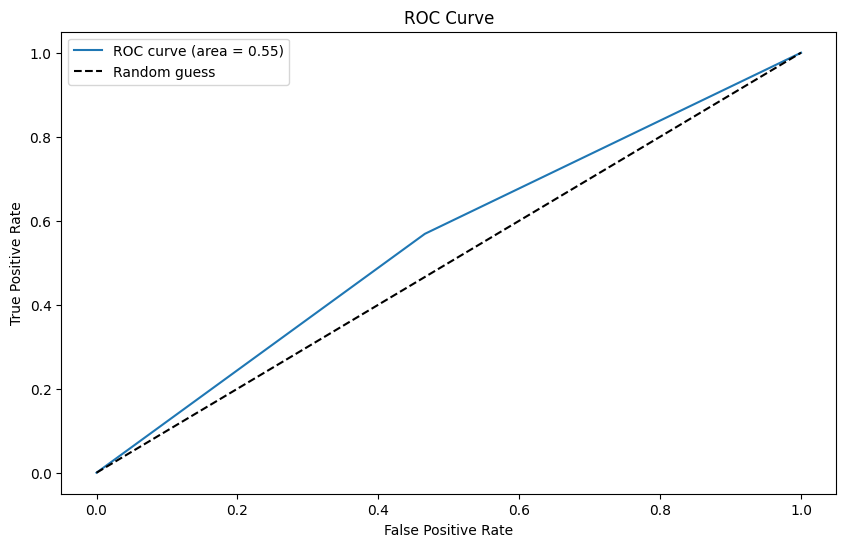

In [33]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_grid)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

From ROC(Receiver Operating Characteristic Curve), it is clear that the model hugs the true positive rate with a value of 0.55. And with area under curve being higher indicates that randomforest classifier has best discriminative ability of classes compared to other three models. 

## Data Mining Pipeline 

Pipeline was built using all the processes from data pre-processing to model fitting and it was tested on full dataset.

Values missing in rows
 90      0
2874    0
4769    0
601     0
5837    0
       ..
5305    0
2786    0
5074    0
2303    0
4144    0
Length: 5833, dtype: int64

Values missing in columns
 feat_seq_entropy    0
feat_C_atoms        0
feat_H_atoms        0
feat_N_atoms        0
feat_O_atoms        0
                   ..
feat_Perc_S         0
feat_Perc_T         0
feat_Perc_V         0
feat_Perc_W         0
feat_Perc_Y         0
Length: 102, dtype: int64
Top features based on Fisher Score: ['feat_KF8' 'feat_F4' 'feat_Z5' 'feat_Perc_T' 'feat_H_atoms'
 'feat_BLOSUM4' 'feat_Perc_Y' 'feat_ST7' 'feat_BLOSUM7'
 'feat_Perc_Charged']
0    3634
1    3634
Name: count, dtype: int64


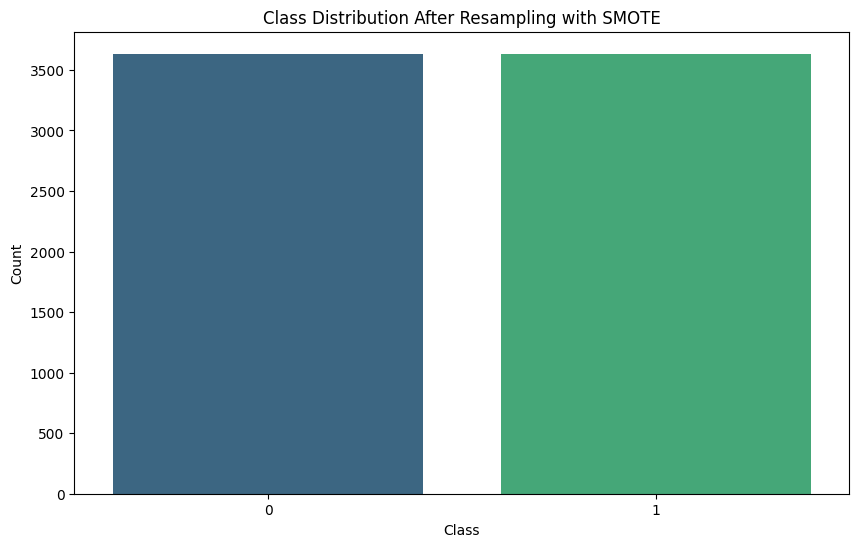

LogisticRegression AUC scores: [0.6571541  0.604315   0.60227821 0.62389116 0.62430135]
LogisticRegression Mean AUC: 0.6223879620419743

RandomForestClassifier AUC scores: [0.81338016 0.78908915 0.79278431 0.81302553 0.81775363]
RandomForestClassifier Mean AUC: 0.8052065549653022

XGBClassifier AUC scores: [0.77534062 0.75738512 0.76317572 0.77428278 0.77602112]
XGBClassifier Mean AUC: 0.7692410713268861

Test AUC for the best model (RandomForestClassifier): 0.4619489441529141


In [34]:
# Data set used 
df2 = pd.read_csv("D:/Vignesh/Understanding Data/df.csv")

# Dropping duplicates
df2 = df2.drop_duplicates()

# Assiging X and y values
X1 = df.drop(columns=target_column)
y1 = df[target_column]

# Train-test split the data [5]
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)

# Verify if missing values are present in rows and columns
miss_obs_row = X2_train.isnull().sum(axis=1)
print("Values missing in rows\n",miss_obs_row)

miss_obs_col = X2_train.isnull().sum(axis=0)
print("\nValues missing in columns\n",miss_obs_col)

# Outlier Treatment[4]
iso_forest = IsolationForest(random_state=42)
outliers = iso_forest.fit_predict(X2_train.select_dtypes(include=[float, int]))
X2_train['outliers'] = outliers

# Remove outliers
non_outliers_indices = X2_train[X2_train['outliers'] != -1].index
X2_train = X2_train.loc[non_outliers_indices].drop(columns='outliers')
y2_train = y2_train.loc[non_outliers_indices]

# Variable Scaling
scaler = StandardScaler()
X2_train_scaled = pd.DataFrame(scaler.fit_transform(X2_train.select_dtypes(include=[float, int])), columns=X2_train.select_dtypes(include=[float, int]).columns)

# Encode target variable to numeric
le = LabelEncoder()
y2_train_encoded = le.fit_transform(y2_train)

# Feature Selection using Fisher Score
min_max_scaler = MinMaxScaler()
X2_train_scaled_minmax = pd.DataFrame(min_max_scaler.fit_transform(X2_train_scaled), columns=X2_train_scaled.columns)
fisher_scores1 = fisher_score.fisher_score(X2_train_scaled_minmax.values, y2_train_encoded)
fisher_scores_df2 = pd.DataFrame({'Feature': X2_train_scaled_minmax.columns, 'Fisher Score': fisher_scores1})
fisher_scores_df2 = fisher_scores_df2.sort_values(by='Fisher Score', ascending=False)
selected_features1 = fisher_scores_df2['Feature'].head(10).values
print(f"Top features based on Fisher Score: {selected_features1}")

# Selecting the top features
X2_selected = X2_train_scaled_minmax[selected_features]

# Reset index to keep them aligned
X2_selected.reset_index(drop=True, inplace=True)
y2_train.reset_index(drop=True, inplace=True)

# Encode target variable to numeric
le = LabelEncoder()
y2_train_encoded = le.fit_transform(y2_train)

# Class Rebalancing
smote = SMOTE(random_state=42)
X2_resampled, y2_resampled = smote.fit_resample(X2_selected, y2_train_encoded)
print(pd.Series(y_resampled).value_counts())

# Visualize the class distribution using a bar graph
plt.figure(figsize=(10, 6))
sns.countplot(x=y2_resampled, hue=y2_resampled, palette='viridis', legend=False)
plt.title('Class Distribution After Resampling with SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Cross-validation setup [6]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate model using cross-validation and AUC
def evaluate_model(model, X, y):
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"{model.__class__.__name__} AUC scores: {auc_scores}")
    print(f"{model.__class__.__name__} Mean AUC: {auc_scores.mean()}\n")
    return auc_scores

# Evaluate models
log_reg_auc = evaluate_model(log_reg, X2_resampled, y2_resampled)
rf_clf_auc = evaluate_model(rf_clf, X2_resampled, y2_resampled)
xgb_clf_auc = evaluate_model(xgb_clf, X2_resampled, y2_resampled)

# Only selected features in test dataset
X2_test = X2_test[selected_features]

# Fit the best model on the training data
best1_model = rf_clf
best1_model.fit(X2_resampled, y2_resampled)

# Predict probabilities on the test set
y2_test_proba = rf_clf.predict_proba(X2_test)[:, 1]

# Label encoding of the test dataset
labelencoder = LabelEncoder()
y2_test_encoded = labelencoder.fit_transform(y2_test)


# Calculate AUC on the test set
test_auc = roc_auc_score(y2_test_encoded, y2_test_proba)
print(f"Test AUC for the best model ({best1_model.__class__.__name__}): {test_auc}")

## Performance evaluation on test split

Best model was Random forest classifier and hyper parametric tuning was conducted. The hyper-parameters were then fit on the training data showing an increase in AUC score from 0.46 to 0.55 almost 10 points increase.

The performance of the hyper-parameters was tested on the test data and the ROC curve is plotted below.

D:\Vignesh\Python\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.71      0.53      0.61       972
           1       0.38      0.57      0.46       487

    accuracy                           0.55      1459
   macro avg       0.55      0.55      0.53      1459
weighted avg       0.60      0.55      0.56      1459

Test AUC for the best model (RandomForestClassifier): 0.5513695591553223


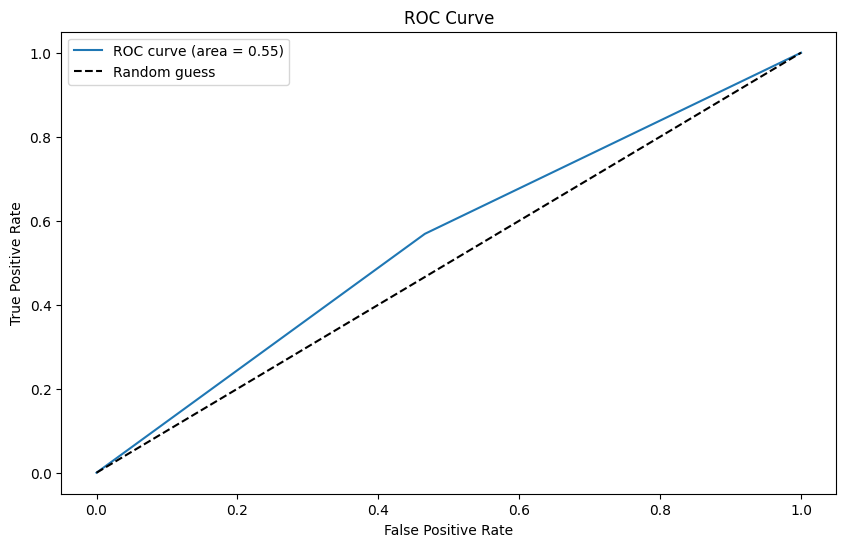

In [35]:
# Random Forest hyperparameter tuning[3]
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6,9,15],
    'max_leaf_nodes': [9, 12, 15],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='roc_auc')
grid_search.fit(X2_resampled, y2_resampled)
print(f"Best hyperparameters: {grid_search.best_params_}")
best1_model = grid_search.best_estimator_

# Fit the best model and predict
best1_model.fit(X2_resampled, y2_resampled)
y2_pred_grid = best1_model.predict(X2_test)

# Classification report
print(classification_report(y2_test_encoded, y2_pred_grid))

# Label encoding of the test dataset
labelencoder = LabelEncoder()
y2_test_encoded = labelencoder.fit_transform(y2_test)

# Calculate AUC on the test set
test1_auc = roc_auc_score(y2_test_encoded, y2_pred_grid)
print(f"Test AUC for the best model ({best_model.__class__.__name__}): {test1_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y2_test_encoded, y2_pred_grid)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {test1_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

On this ROC graph as well we could see that random forest classifier has been proven once again that it has the best descriminative ability between the classes on unseen data. The area under the curve is high summarising that this the best fit model for the provided dataset.

## Conclusion

In this project we have achieved by developing a predictive pipeline to identify linear B-cell epitopes from protein sequence. Fisher score feature selection technique gave the best features from the dataset. The best model turned out to be RandomForest Classifier providing an ROC score of 0.56 showing its predicitbility and reliability on unseen data.  

## References

1. Feature Selection - 1.13. Feature selection — scikit-learn 1.5.1 documentation
2. Feature Explanation - Feature Selection Techniques in Machine Learning - GeeksforGeeks
3. Random Forest Hyperparameter Tuning in Python - GeeksforGeeks
4. An Introduction to Isolation Forests (r-project.org)
5. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html